In [4]:
# This is a webpage to honor those who served on the DD 414 USS Russell during WWII.

In [5]:
# Make a map showing the routes from month to month and year to year.
# Create pages for locations of interest visited by the ship. Include present-day status, developments, etc.
# Layer-in highlights of other events and personalities that were happening concurrently with the Russell's activities.
# Look up USS Gwin, first ship before Russell.

## Resources
* http://navsource.org/
* http://www.navsource.org/archives/05/414.htm

In [6]:
%reload_ext lab_black

In [7]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import os, csv, requests, json, datetime
import numpy as np
from config import mapbox_token
from datetime import date

px.set_mapbox_access_token(mapbox_token)

------
<img src="./images/0541417.jpg" alt="USS Russell - DD 414" style="border: 1px solid darkgray" align="left" width="600px">
<span style="color:navy">
<h1 align="center">The USS Russell</h1>
<h3 align="center">DD 414</h3>
<h2 align="center">World War II</h2>
    
<span style="color:navy">
   
---

<span style="color:navy">
   
#### “Not all those who wander are lost.” — Bilbo Baggins
    
#### “The world is full enough of hurts and mischances without wars to multiply them.” – Warden
    
#### “This day does not belong to one man but to all. Let us together rebuild this world that we may share in the days of peace.” – Aragorn
    
#### “You step into the Road, and if you don’t keep your feet, there is no knowing where you might be swept off to.”― J.R.R. Tolkien

#### “There’s some good in this world, Mr. Frodo… and it’s worth fighting for.” — Sam Gangee

#### “The board is set, the pieces are moving. We come to it at last, the great battle of our time.” – Gandalf
            
    
-----
    
#### <blockquote>Image citation: </blockquote>

### Find dates and places of the ship during WWII
* Check books for sources, "Survivor" -Barry Friedman
* Add field for event type: attack, re-supply/R&R, convoy, ... , and color markers by type. Use red for battles, blue for convoy/travel, green for re-supply, etc.

In [160]:
# Best to build this here or better to make in a CSV or Excel file first?
# Timeline = Event, Date, Location, Commentary, Latitude, Longitude, Action
# Add changes of command
# Hovering over or clicking on an event highlights the ship's location on the map.
# Show on the map other notable events occurring at the same time as Russell's actions.

timeline = [
    (
        "Keel Date",
        "12-20-1937",
        "Newport News, VA",
        "Newport News Shipbuilding & Drydock Co.",
        37.0870821,
        -76.4730122,
    ),
    (
        "Launch Date",
        "12-8-1938",
        "Newport News, VA",
        "NA",
        37.0870821,
        -76.4730122,
    ),
    (
        "Commissioned",
        "11-3-1939",
        "Newport News, VA",
        "NA",
        37.0870821,
        -76.4730122,
    ),
    (
        "Decommissioned",
        "11-15-1945",
        "San Diego, CA",
        "NA",
        32.7152778,
        -117.1563889,
    ),
    (
        "Lend Lease Act Signing",
        "09-01-1940",
        "Halifax, Nova Scotia",
        "Exact date in September unknown. Check historical record on Lend-Lease Act.",
        44.65,
        -63.6,
    ),
    (
        "Target Practice",
        "12-7-1941 12:53",
        "Cosco Bay, Maine",
        "NA",
        43.640800,
        -70.257440,
    ),  # 7:53am Honolulu time, first wave of Japanese attack on Pearl Harbor
    (
        "Repairs",
        "12-17-1941",
        "New York Navy Yard",
        "Received orders for the Pacific sailing with the carrier Yorktown and four other destroyers.",
        40.712345,
        -74.005531,
    ),
    (
        "Set sail with reinforcements",
        "01-06-1942",
        "San Diego Naval Base",
        "Sailed west, screening reinforcements to Samoa.",
        32.7152778,
        -117.1563889,
    ),
    (
        "F4F Wildcat pilot rescue",
        "01-08-1942",
        "Pacific",
        "F4F Wildcat crashed after takeoff from Yorktown. Russell rescued pilot.",
        23.4871,
        -126.9387,  # Estimated location based on timing description, estimated speed, and distance calculation. Obtained resulting lat/long from Google Earth.
    ),
    (
        "Arrival in Samoa",
        "01-20-1942",
        "Pago Pago, Samoa",
        "Arrived in Samoa with reinforcements.",
        -14.273280,
        -170.702970,
    ),
    (
        "Depart Samoa enroute to Gilbert Islands",
        "01-25-1942",
        "Pago Pago, Samoa",
        "Left Samoa for joint attack on Gilbert and Marshall Islands with Yorktown and Enterprise task forces.",
        -13.9742,
        -170.8775,
    ),
    (
        "Attack at the Gilbert Islands",
        "02-01-1942",
        "Gilbert Islands",
        "Aircraft from Yorktown attack Japanese naval bases. Kiribati, Tarawa.",
        0.0584,
        -174.0021,
    ),
    (
        "Arrive Pearl Harbor, Hawaii",
        "02-06-1942",
        "Pearl Harbor, Hawaii",
        "Repairs and resupply at Pearl Harbor.",
        21.339260,
        -157.960922,
    ),
    (
        "Airmen Rescue",
        "12-23-1941",
        "Pacific",
        "Rescued two airmen crashed after takeoff from Yorktown. Location uncertain.",
        15.305380,
        -108.701307,
    ),
    (
        "Submarine Encounter",
        "12-20-1941",
        "Pacific near Panama Canal",
        "Attacked probable submarine shortly after entering Pacific Ocean. Location uncertain.",
        5.840081,
        -83.121784,
    ),
    (
        "Battle of the Coral Sea",
        "05-07-1942",
        "Coral Sea",
        "Engaged enemy planes while screening Lexington and Yorktown. Lexington was hit, heavily damaged and abandoned.",
        -19.3618,
        155.9041,
    ),
    (
        "Arrival in New Caledonia",
        "03-31-1942",
        "Noumea, New Caledonia",
        "Re-supply and R&R for the crew.",
        -22.2942,
        166.4678,
    ),
    #     (
    #         "event",
    #         "date",
    #         "Tonga, Tonga",
    #         "description",
    #         -21.1134,
    #         175.1852,
    #     ),
    (
        "Depth charge attack",
        "03-21-1942",
        "Coral Sea",
        "Probable kill. Approximate date and location.",
        -16.1189,
        156.7078,
    ),
    (
        "Attack at New Guinea",
        "03-10-1942",
        "Lae and Salamaua, New Guinea",
        "Attacked Japanese troop transports landing in New Guinea in preparation for air assault on Australian-held Port Moresby.",
        -8.6395,
        145.7876,
    ),
]

In [161]:
df = pd.DataFrame(
    timeline,
    columns=["event", "event_date", "location", "comment", "latitude", "longitude"],
)

In [162]:
df["date"] = pd.to_datetime(df["event_date"])

In [163]:
df.sort_values(by="date", inplace=True)

In [164]:
# Write to CSV file
df.to_csv("timeline.csv", index=False)

### Compare SQLAlchemy with PostgreSQL
### No need to reset or reorder index since it's not used and not included in export to CSV. How is it represented in SQL DB?

In [165]:
df

,event,event_date,location,comment,latitude,longitude,date
0,Keel Date,12-20-1937,"Newport News, VA",Newport News Shipbuilding & Drydock Co.,37.087082,-76.473012,1937-12-20 00:00:00
1,Launch Date,12-8-1938,"Newport News, VA",NA,37.087082,-76.473012,1938-12-08 00:00:00
2,Commissioned,11-3-1939,"Newport News, VA",NA,37.087082,-76.473012,1939-11-03 00:00:00
4,Lend Lease Act Signing,09-01-1940,"Halifax, Nova Scotia",Exact date in September unknown. Check histori...,44.650000,-63.600000,1940-09-01 00:00:00
5,Target Practice,12-7-1941 12:53,"Cosco Bay, Maine",NA,43.640800,-70.257440,1941-12-07 12:53:00
6,Repairs,12-17-1941,New York Navy Yard,Received orders for the Pacific sailing with t...,40.712345,-74.005531,1941-12-17 00:00:00
14,Submarine Encounter,12-20-1941,Pacific near Panama Canal,Attacked probable submarine shortly after ente...,5.840081,-83.121784,1941-12-20 00:00:00
13,Airmen Rescue,12-23-1941,Pacific,Rescued two airmen crashed after takeoff from ...,15.305380,-108.701307,1941-12-23 00:00:00
7,Set sail with reinforcements,01-06-1942,San Diego Naval Base,"Sailed west, screening reinforcements to Samoa.",32.715278,-117.156389,1942-01-06 00:00:00
8,F4F Wildcat pilot rescue,01-08-1942,Pacific,F4F Wildcat crashed after takeoff from Yorktow...,23.487100,-126.938700,1942-01-08 00:00:00


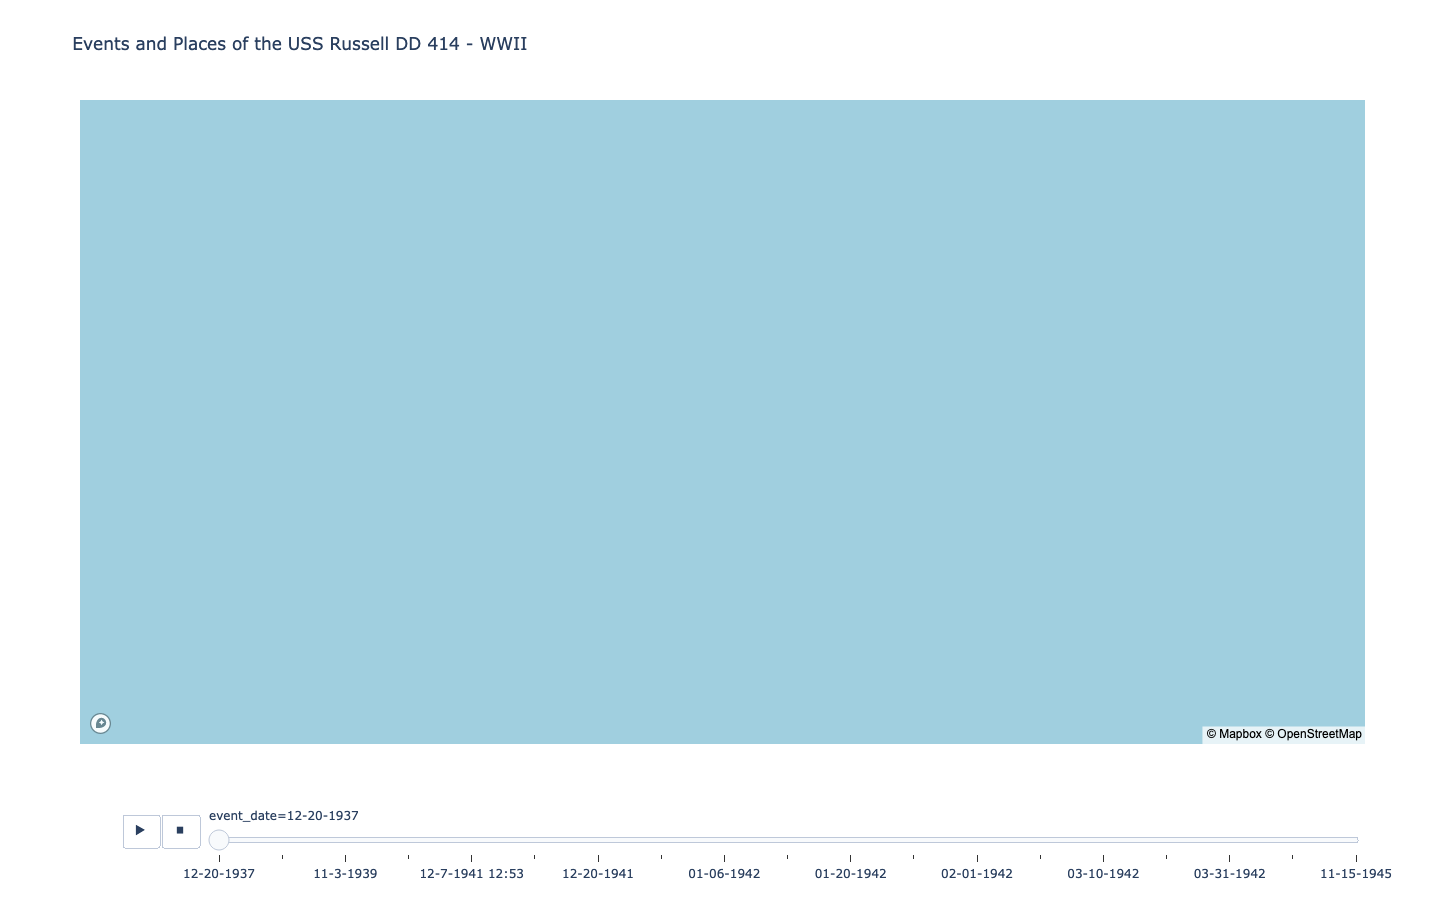

In [166]:
# mapbox_style: str (default `'basic'`, needs Mapbox API token)
#     Identifier of base map style, some of which require a Mapbox API token
#     to be set using `plotly.express.set_mapbox_access_token()`. Allowed
#     values which do not require a Mapbox API token are `'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`.

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    #     color="action",
    #     size="event",
    hover_name="event",
    hover_data=["date", "location", "comment"],
    title="Events and Places of the USS Russell DD 414 - WWII",
    mapbox_style="basic",
    width=1250,
    height=900,
    animation_frame="event_date",  # The single line that brings animation to the map based on the parameter indicated
)
fig.update_traces(
    marker_size=20,
    marker_color="navy",
    selector=dict(
        type="scattermapbox"
    ),  # Color starts with navy but changes to default after first frame. Recall this from eBird project...
)

fig.show()

### Try some NLP techniques on this.

From https://www.historycentral.com/navy/destroyer2/russell.html

Russell (DD-414: dp. 1570; 1. 348'2"; b. 36'1"; dr. 11'5"; s. 35 k.; opl. 192'; a. 5 5", 8 21" tt., 2 dct.; cl. Sims) Russell (DD-414) was laid down 20 December 1937 by the Newport News Shipbuilding & Dry Dock Co., Newport News, Va., launched 8 December 1938, sponsored by Mrs. Charles H. Marshall, grandaughter of Rear Admiral Russell and commissioned 3 November 1939, Lt. Comdr. J. C. Pollock in command. Commissioned 2 months after the outbreak of World War II in Europe, Russell oruised in the western Atlantic and in the Caribbean on Neutrality Patrol until the bombing of Pearl Harbor. Then ordered to the Pacific, she transited the Panama Canal and proceeded to San Diego, whence, on 6 January 1942, she sailed west, screening reinforcements to Samoa. By the time of her arrival, 20 January, the Japanese had moved into Malaya, Borneo, the Celebes, the Gilberts, and the Bismarck Archipelago. Within the week, Rabaul fell and the Japanese continued on to New Ireland and the Solomons while further west they extended their occupation of the Netherlands East Indies. On the 25th, Russell sailed north with TF 17, screened Yorktown (CV-5) as her planes raided Makin, Mili, and Jaluit on 1 February, then set a course for Pearl Harbor. In midmonth, the forge sailed again. Diverted from its original destination, Wake, it oovered forces establishing an airbase on Canton Island, important on the Hawaii-Samoa-Fiji route to Australia and less than 1,000 miles from 1\/lakin. Raids on Rabaul and Gasmata were next ordered to cover a movement of troops to New Caledonia, but on 8 Marchthe Japanese landed at Salamaua and Lae in New Guinea and Port Moresby was threatened. The force, again joined by the Le~ington foiee—as in the Gilberts' raid, steamed into the Gulf of Papua, whence, on the 10th, planes were sent over the Owen Stanley Range to bomb the newly-established Japanese bases on the l Iuon Gulf. Through April, Russell continued to screen the Yorktown force, operating primarily in the ANZAC area. Detached on 3 May to screen Neosho during fueling operations with TF 11 she rejoined TF 17 early on the 5th and resumed screening duties for the force's heavier units. On the 7th, in the Coral Sea, she engaged enemy planes closing the formation to threaten Yorktown and Lexington (CV-2) and to support Japanese forces in an assault on Port Moresby. Le~ington hit and heavily damaged, but still in action, continued to recover and launch planes. Three hours later, however, she reported a serious explosion. A second followed. Her fires were no longer under oontrol. She soon oommeneed abandoning ship. Russell joined her screen; eireled the crippled ship as rescue ships evacuated personnel, and, with the completion of that work, departed the scene of the Battle of the Coral Sea. Retiring to Tonga, Russell debarked 170 survivors from Lerington and sailed for Pearl Harbor. Arriving on the 27th she headed out again on the 30th, this time toward Midway. On 4 June, Task Forees 16 and 17 again met the enemy in an air duel, through which Russell steamed in the screen of Yorktown. In the afternoon, enemy torpedo planes broke through the screen and scored successfully on the carrier. The patched-up survivor of the Coral Sea was abandoned. Russell took on 492 of her crew and aviation personnel. The next day she transferred 27 to Astoria (CA-34) to assist in salvage operations on the carrier, but the Japanese torpedoes negated the effort and Yorktown and Hamr7zann (DD-412) were lost. On the 10th, Russell covered the transferral of replacements from Saratoga (CV-3) to Hornet (CV-8) and Enterprise (CV-6); and, on the 13th, she returned to Pearl Harbor. Engaged in training exercises for the next 2 months, Russell again sortied with TF 17 on 17 August, took station screening Hornet; and headed southwest. On the 29th, TF 17 joined TF 61, becoming TG 61.2. On the 31st Saratoga took a torpedo and Russell conducted an unsuccessfulsubmarine hunt, the first of many in the long and costly campaign for Guadaleanal. On 6 September, one of Hornet's planes dropped an explosive off Russell's starboard quarter to detonate a torpedo. Another submarine search commenced At l 452 she established contact and dropped six 600-pound depth charges. At 1513, she sighted an oil slick 1 mile by one-half mile, but contact was lost at 700 yards and never regained Through the remainder of the year, and into the new, Russell continued to operate in support of the Guadaleanal campaign. On 25 and 26 October, she participated in the Battle of the Santa Cruz Islands, during which she again joined in rescue operations for a sinking carrier, this time Hornet, from which she transferred the commander of Task Foree 17, Rear Adm. George D. Murray and his staff to Pensacola (CA-24), seriously wounded personnel to Northampton (CA-26), and other survivors to Noumea where Russell's superstructure damaged during rescue work—was repaired. During December and into January 1943, she screened eonvoys to Guadaleanal and Tulagi, then to Rennel. In February, she screened Enterprise; then, in March, resumed convoy escort work, making one run to Australia and back by midApril. On 1 May the destroyer set a course for the west coast. At the end of July, after overhaul at Mare Island, she steamed north to join forces staging for the "invasion" of Kiska. Aleutian patrol duty follou ed, and, w ith the arrival of autumn, she turned south to escort landing craft to Hawaii. In October, she continued on to Wellington, New Zealand and, in early November, she escorted transports to the Ne~- Hebrides where she joined TF 53, then preparing to push into the Gilberts. Underway on the 13th with the Task Force, she arrived with the troop transports off Betio, Tarawa, on the 20th, then screened heavier units as they shelled the shore. Remaining in the area until the 25th, she provided gunfire support and screened tho transports as they filled with Marine casualties. On the 27th, she joined TG 50.:3 and, with TG 50.1, sailed for the Marshalls. On 4 December, carrier planes raided Kwajalein and Wotje, and, on the 9th, the force returned to Pearl Harbor, whence Russell continued on to the west coast. On 13 January 1944, Russell, screening TG 53.5, departed the California coast. Training in the Hawaiian Islands followed. On the 22d the force headed west. On the 30th, Russell joined other destroyers and heavier units in shelling Wotje. On the 31st, she rejoined the main force off Kwajalein and after initial screening duties, added her guns to the naval gunfire support line. On 2 Fehruary, she screened CarDiv 22 and on the 3d, entered Kwajalein lagoon. Standing out 5 days later, she arrived at Pearl Harbor on the 15th and was directed on to Puget Sound for repairs. Repairs completed in March, Russell returned to lIawaii in early April; then escorted U.S. Army tug, Willard Holbrook to New Guinea where she rejoined her squadron, DesRon 2. Arriving at Finsehafen 4 May, she reported to the commander of TF 76 at Sudest on the 6th and commenced 5 months of intensive and navigationally difficult escort work along the New Guinea coast. Assigned initially to escort LST's resupplying Hollandia and Aitape, she joined TF 77 on the 16th and covered LCI's and AT's to the Wakde-Sarmi area. From the 17th to the 20th, she stood off Wakde, marking the approach channel on the first day of the campaigns there and providing fire support and screening services on the others. On the 20th, she returned to Humboldt Bay and 5 days later sailed with LST's for Biak to commence Operation "Horliek." On the 27th, she shelled Padiator Island, patrolled between Pai and Pandiadori Islands, blasted targets on Biak, and then got underway to return to Humboldt Bay. Into June, she continued to escort convoys to and provide cover for operations at Biak and Wakde. In mid-June, she participated in a bombardment of the Toem area, then resumed escort runs along the coast. In early July, Noemfoor, with its two Japanese airfields, became the target. At midmonth Russell gained a brief respite at Manus, then at the end of the month rommenced Operation "Globetrotter," the capture of Sansapor. Through August, she continued operations in support of the campaign and, in mid-September, moved forward to the Sloluccas to cover the occupation of Morotai, the last stepping stone on the southern route to the Philippines and on the eastern route to Borneo and the Netherlands East Indies. On 13 October Russell sailed with TF 78 for the Philippines and on the 20th, as the troops of the Northern Attack Foree landed south of Taeloban, patrolled off Alabat Point. 0n the 21st she took up fire support duties to the north of the unloading area. Through the 24th she remained in San Pedro Bay; resumed patrol in Leyte Gulf on the 25th; and, on the 26th, got underway for New Guinea, whence during November and December, she escorted reinforcements to Leyte. On 28 December Russell departed Aitape for her next amphibious operation—the invasion of Luzon—and steamed into the Mindoro Sea on 5 January 1945. Two days later, she joined three other destroyers in forming an interceptor force 5 miles on the starboard of the San Fabian Attack Foree to destroy any enemy ships attempting a sortie from Manila Bay against the convoy. At 2230 an enemy destroyer Hinoki was detected and fired on. The shells found their mark, Hinoki exploded and sank within 20 minutes. On the 9th, the force, having survived harassing attacks bv planes, boats, and ships, arrived in Lingayen Gulf and Russell assumed screening duties off the transport area. For 9 days she patrolled, illuminated, bombarded, aml fought off kamikazes. From the 18th to the 23d, she escorted damaged ships back to Levte and, on the 27th, sailed north again. On the 31st, she ariived off Nasugbu Bay, covered YMS's as they cleared approach channels, then fired on enemy emplacements on Nasugbu Point. Relieved in late afternoon she returned to Lingayen Gulf, thence, on 2 February, to Leyte, New Guinea, and the Solomons. Russell arrived at Guadaleanal 15 February rejoined the 5th Fleet and prepared for Operation "Iceberg;'; the Okinawa offensive. On 1 April, she arrived off the assault beaches and commenced screening the Northern Transport area. From the 3d to the 5th, she patrolled north of Ie Shima, then returned to the transport area to escort a convoy to Ulithi. Returning to the Hagushi beaches with reinforcements on the 21st, she shifted to Kerama Retto, whence she patrolled in carrier operating area "Rapier," south of Okinawa, into May. Detached from carrier screening duty on the 27th, she proceeded to the Hagushi anchorage and got underway the following day for the United States and a yard overhaul. Still undergoing overhaul at Seattle when the war ended R[/R?'II was prepared for inactivation during September; and, on 15 November, she was decommissioned. Thirteen days later she was struck from the Navy list and, in September 1947, she was sold for scrap to the National Metal & Steel Corp., Terminal Island, Calif. Russell earned 16 battle stars during World War II.

<span style="color:navy">

#### "The world breaks everyone, and afterward, many are strong at the broken places." -Ernest Hemingway

### A scrolling timeline. As plotly mapbox plays through the timeline on the left, the storyline on the right cycles through with images and supporting text. Manually click to move to the next event.